<a href="https://colab.research.google.com/github/ShubhPathania/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Shubham Pathania


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/ShubhPathania/Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Objective:**

Develop a robust regression model to predict the demand for bike rentals in Seoul, South Korea. This model will anticipate the number of bikes rented at specific times, considering various factors that influence rental decisions.

**Features:**

- Temporal data: Date and time information
- Weather conditions: Temperature, humidity, precipitation, etc.
- Other relevant factors (explore based on data availability):
  1. Seasonality
  2. Holidays
  3. Functioning Day or Operational Day

**Evaluation:**

The model's effectiveness will be assessed using standard regression evaluation metrics:

- Mean Squared Error (MSE): Represents the average squared difference between predicted and actual rental values.

- Mean Absolute Error (MAE): Measures the average magnitude of prediction errors.

- R-squared (R²): Represents the proportion of variance in rental demand explained by the model.

**Potential Impact:**

- An accurate predictive model can significantly improve the efficiency of Seoul's bike rental system. By effectively anticipating demand, resources can be allocated strategically and service availability can be optimized. This can lead to reduced wait times for users, sufficient bikes during peak times, improved user experience, potentially encouraging a wider adoption of bike rentals as a sustainable transportation option.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
try:
  bike_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/Module - 6/Project Datasets/SeoulBikeData.csv", encoding="ISO-8859-1")
  print('Dataset loaded successfully.')
except:
  print("Some Error occured.")

Dataset loaded successfully.


### Dataset First View

In [4]:
# Dataset First Look
df_first_view = pd.concat([bike_df.head(), bike_df.sample(3), bike_df.tail()])
df_first_view

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.00,0.0,0.0,Autumn,No Holiday,No
4572,09/06/2018,1462,12,28.2,42,1.4,1563,14.0,2.84,0.0,0.0,Summer,No Holiday,Yes
7652,15/10/2018,1659,20,15.9,81,2.8,250,12.6,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
num_rows, num_columns = bike_df.shape

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 8760
Number of Columns: 14


### Dataset Information

In [6]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

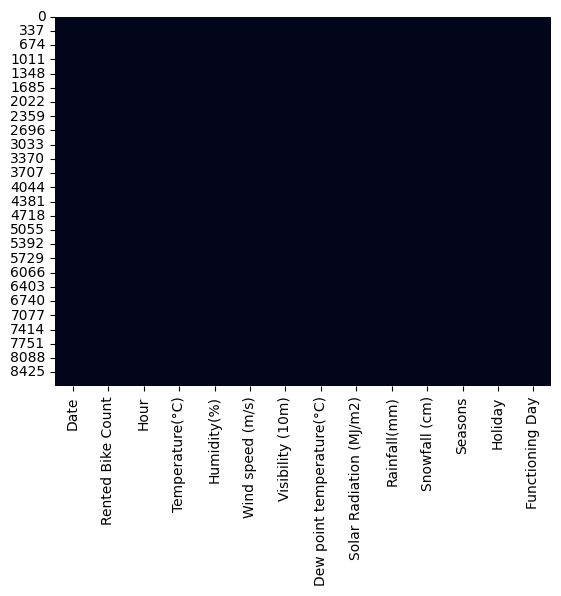

In [9]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull(), cbar= False)

In [10]:
# Summary of Dataset
def dataset_info():
  col = pd.DataFrame(index = bike_df.columns)
  col["data_type"] = bike_df.dtypes
  col["duplicate_count"] = bike_df.duplicated().sum()
  col["count_of_non_null_values"] = bike_df.count()
  col["Missing/Null_values"] = bike_df.isnull().sum()

  return col

print("\t\t\t\t\t\033[1mSummary of Dataset\033[0m\n")
dataset_info()

					Summary of Dataset



,data_type,duplicate_count,count_of_non_null_values,Missing/Null_values
Date,object,0,8760,0
Rented Bike Count,int64,0,8760,0
Hour,int64,0,8760,0
Temperature(°C),float64,0,8760,0
Humidity(%),int64,0,8760,0
Wind speed (m/s),float64,0,8760,0
Visibility (10m),int64,0,8760,0
Dew point temperature(°C),float64,0,8760,0
Solar Radiation (MJ/m2),float64,0,8760,0
Rainfall(mm),float64,0,8760,0


### What did you know about your dataset?

From the data exploration we have done so far, we have identified the following important characteristics:

**1. General Information:** The dataset has 8760 rows and 14 columns.

**2. Column Information:** Most of the columns are in the correct datatype, but the Date column appears to be of object type, which might need to be converted to datetime. These columns show an indirect relation with bike demands over time, including different weather conditions.

**3. Duplicate Values:** No duplicate rows were observed in the dataset.

**4. Missing Values:** There were no missing or null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Describe
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
# Dataset Columns
pd.DataFrame(bike_df.columns, columns = ["Variables of Dataset"])

,Variables of Dataset
0,Date
1,Rented Bike Count
2,Hour
3,Temperature(°C)
4,Humidity(%)
5,Wind speed (m/s)
6,Visibility (10m)
7,Dew point temperature(°C)
8,Solar Radiation (MJ/m2)
9,Rainfall(mm)


### Variables Description

The dataset has 14 columns and are identified as below:

1. **Date:** The column specifies the date of observation.
2. **Rented Bike Count:** The column specifies the total number of bikes rented at the time of observation.
3. **Hour:** The column specifies the hour of the day.
4. **Temperature(°C):** The column specifies the temperature in celcius at the time of observation.
5. **Humidity(%):** The column specifies the relative humidity in percentage at the time of observation.
6. **Wind speed (m/s):** The column specifies the wind speed in meter per second at the time of observation.
7. **Visibility (10m):** The column specifies the visibilty in meter at the time of observation.
8. **Dew point temperature(°C):** The column specifies the dew point temperatue in celcius at the time of observation.
9.	**Solar Radiation (MJ/m2):** The column specifies the solar radiation in mega-joules per square meter at the time of observation.
10.	**Rainfall(mm):** The column specifies the rainfall in millimeters at the time of observation.
11.	**Snowfall (cm):** The column specifies the snowfall in centimeters at the time of observation.
12.	**Seasons:** The column specifies the season of the year during data was recorded
13.	**Holiday:** The column specifies whether it was holiday when the data was recorded, (binary column: Yes/No).
14.	**Functioning Day:** The column specifies whether it was a functioning or operational day for company when the data was recorded, (binary column: Yes/No).

### Check Unique Values for each variable.

In [13]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [14]:
# Check Unique Values for each variable.
variable_list = list(bike_df.columns)

def check_unique_values(variable):
  unique_values = bike_df[variable].unique()
  return unique_values

In [15]:
pd.DataFrame(check_unique_values(variable_list[11]), columns = ["Unique Seasons"])

,Unique Seasons
0,Winter
1,Spring
2,Summer
3,Autumn


In [16]:
pd.DataFrame(check_unique_values(variable_list[12]), columns = ["Unique Holiday"])

,Unique Holiday
0,No Holiday
1,Holiday


In [17]:
pd.DataFrame(check_unique_values(variable_list[11]), columns = ["Unique Functioning Day"])

,Unique Functioning Day
0,Winter
1,Spring
2,Summer
3,Autumn


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Convert Date column to datetime datatype
bike_df["Date"] = pd.to_datetime(bike_df["Date"], dayfirst= True)

# Extract day and month from Date column
bike_df["Day"] = bike_df["Date"].dt.day_name()
bike_df["Month"] = bike_df["Date"].dt.month

In [19]:
bike_df.sample(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month
4300,2018-05-29,204,4,19.8,60,1.9,1364,11.8,0.00,0.0,0.0,Spring,No Holiday,Yes,Tuesday,5
4504,2018-06-06,1940,16,27.9,47,2.8,824,15.5,2.36,0.0,0.0,Summer,Holiday,Yes,Wednesday,6
3834,2018-05-09,3130,18,20.6,41,2.3,2000,6.8,1.10,0.0,0.0,Spring,No Holiday,Yes,Wednesday,5


### Data Analysis

**1. Rented Bike Demand Over Time**

In [20]:
daily_rental_count = bike_df.groupby("Date")["Rented Bike Count"].sum()
daily_rental_count

Date
2017-12-01     9539
2017-12-02     8523
2017-12-03     7222
2017-12-04     8729
2017-12-05     8307
              ...  
2018-11-26    17162
2018-11-27    16282
2018-11-28    16524
2018-11-29    16423
2018-11-30    16297
Name: Rented Bike Count, Length: 365, dtype: int64

**2. Seasonal Analysis**

In [21]:
seasonal_count = bike_df.groupby("Seasons")["Rented Bike Count"].sum()
seasonal_count

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

**3. Hourly Demand on an Average**

In [22]:
hourly_count = bike_df.groupby("Hour")["Rented Bike Count"].mean()
hourly_count

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

**4. Holiday vs. Non Holiday**

In [23]:
holiday_count = bike_df.groupby("Holiday")["Rented Bike Count"].sum()
holiday_count

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

**5. Functional Day Anlaysis**

In [24]:
functioning_day_count = bike_df.groupby("Functioning Day")["Rented Bike Count"].sum()
functioning_day_count

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

**6. Correlation Analysis**

In [25]:
columns = ["Rented Bike Count", "Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", \
           "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", \
           "Snowfall (cm)", "Month"]

correlation_matrix = bike_df[columns].corr()
print(correlation_matrix)

                           Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  4.102573e-01         0.538558   
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Month                               0.133514  1.749134e-15         0.216183   

                           Humidity(%)  Wind speed 

### What all manipulations have you done and insights you found?

The detailed overview of all the manipulations done so far is as follows as:

- The Date column was originally in an object datatype, so it was necessary to convert it into a Datetime datatype for date-related analysis.

- Two new columns (Day, Month) were extracted from the Date column to capture more nuances in the analysis.

Later, data analysis was performed on some important aspects of the dataset:

1. Rental Bike Demand Over Time: A series showing the demand of rented bikes over time from 2017-12-01 to 2018-11-30.

2. Seasonal Analysis: A series with four seasons: Autumn, Spring, Summer and Winter, showing the demand of rented bikes throughout these seasons.

3. Average Hourly Demand: A series showing avergae demand of rented bikes at different times of the day.

4. Functional Day Analysis: The total count of rented bikes on functional or no-functional days.

5. Correlation Analysis: Correlation of rented bikes against different weather conditions and calendars.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 (Rented Bike Demand Over Time)**

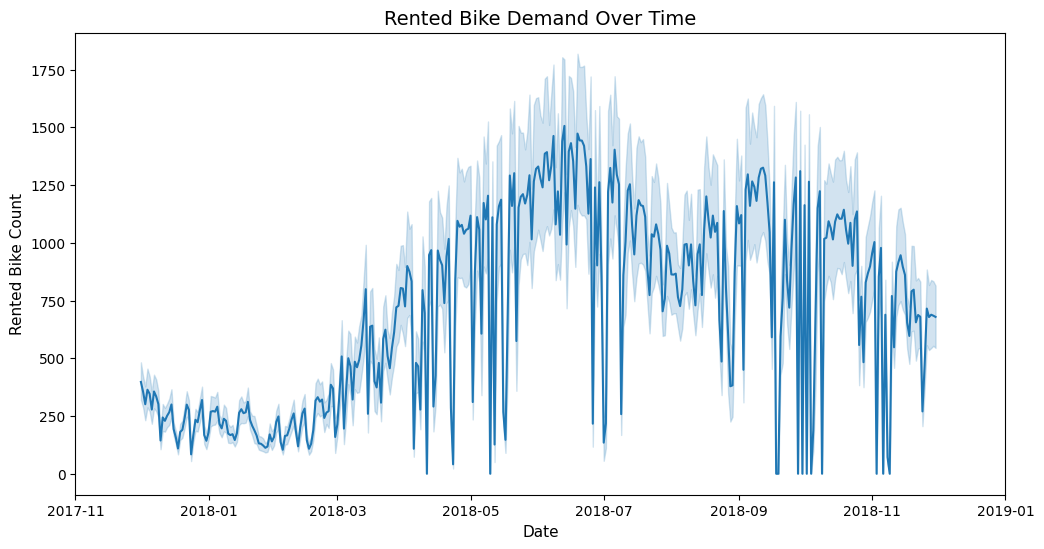

In [26]:
# Plot the data
plt.figure(figsize= (12, 6))
sns.lineplot(data= bike_df, x="Date", y="Rented Bike Count")

# Set chart title and axis labels
plt.title("Rented Bike Demand Over Time", size= 14)
plt.xlabel("Date", size= 11)
plt.ylabel("Rented Bike Count", size= 11)

# Set the x-axis limits
plt.xlim(pd.Timestamp('2017-11'), pd.Timestamp('2019-01'))

plt.show()

##### 1. Why did you pick the specific chart?

A line plot was chosen for this visualization because it effectively shows the trend of rented bikes count over the years. A line plot is suitable for showing the progression of a numeric variable (Rented Bike Count) across a continuous axis (years).

##### 2. What is/are the insight(s) found from the chart?

Several insights are drawn from the chart, as follows:

1. Constant Demand in 2017: The year 2017 showed a consistent but not very promising trend in rented bike demand. This could be because the company might have just started their business at that time.

2. Fluctuating Demand in 2018: The trend changed significantly after 2017. There was a huge demand for rented bikes in the middle and end of 2018. However, there were also a few months with a significant drop (close to 0) in demand. This suggests that certain factors or reasons might be influencing the demand.

##### 3. Will the gained insights help creating a positive business impact?


These insights can potentially create a positive business impact in the following ways:

1. Identification of High and Low Demand Periods: Understanding periods of high demand can help the company focus on promotional activities and inventory management during these times. Whereas, also knowing low demand periods allowing the company to investigate potential issues and adjust strategies accordingly.

2. Strategic Adjustments: The company can optimize operations and marketing efforts based on demand patterns. This can include targeted promotions, better inventory planning and improved resource allocation.

Are there any insights that lead to negative growth? Justify with specific reason.

However, there are also some potential negative implications of the insights that need to be addressed:

- The insights highlight periods with significant drops in demand, which could lead to negative growth if not addressed. Potential reasons for these drops might include seasonal variations, weather conditions, competition or operational issues.  Addressing these issues efficiently can help avoid negative impacts on growth.

#### **Chart - 2 (Rented Bike Demand During Different Seasons)**

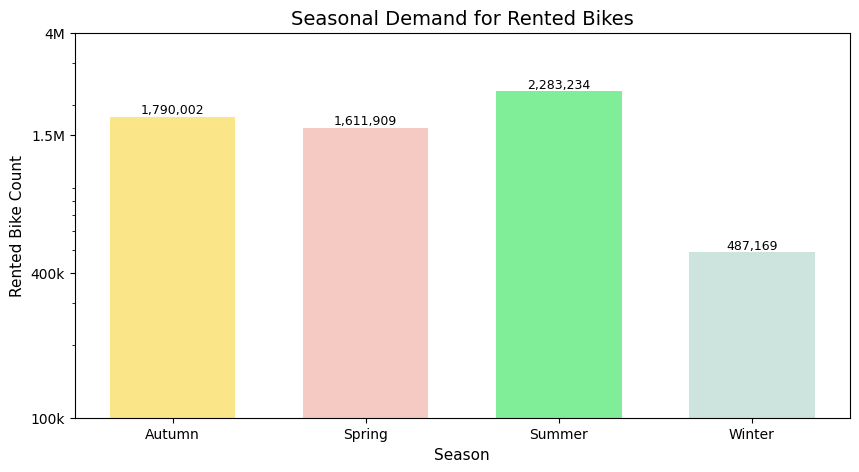

In [27]:
# Define color for the chart
colors = ['#fae588', '#f5cac3', '#80ed99',  '#cce3de']

# Plot the bar chart
plt.figure(figsize= (10, 5))
bars = plt.bar(seasonal_count.index, seasonal_count.values, width= 0.65, color= colors)

# Set chart title and axis labels
plt.title("Seasonal Demand for Rented Bikes", size= 14)
plt.xlabel("Season", size= 11)
plt.ylabel("Rented Bike Count", size= 11)

# Custom y-ticks range
plt.yscale('log')
plt.yticks(ticks=[10**5, 4*10**5, 1.5*10**6, 4*10**6],
           labels=['100k', '400k', '1.5M', '4M'])

# Add annotations for each bar with the corresponding number of bike counts
for bar, value in zip(bars, seasonal_count.values):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:,}',
             size= 9, ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it is effective in visually representing categorical data (seasons) and associated quantitative values (bike counts). Each season is represented by a bar, and height of each bar is corresponding to count of rented bikes.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart of seasonal demand for rented bikes are as follows:

1. Seasonal Demand Variation: Summer exhibits the highest demand for bikes, followed by Autumn and Spring. This trend suggests that favorable weather conditions during these seasons likely contribute to increased outdoor activities and bike rentals.

2. Low Demand in Winter: The chart shows the lowest demand during the Winter season. This can be attributed to less favorable weather conditions, such as cold temperatures and potential precipitation, which typically discourage outdoor activities like biking.

##### 3. Will the gained insights help creating a positive business impact?


These insights can potentially create a positive business impact in the following ways:

1. Optimized Resource Allocation: By understanding seasonal demand patterns, the business can allocate resources more efficiently. For example, they can adjust inventory levels and staffing during peak seasons like Summer, Autumn, and Spring to meet increased demand.


Are there any insights that lead to negative growth? Justify with specific reason.


Yes, there are also some potential negative implications of the insights that need to be addressed:

- The low demand observed during Winter could negatively impact revenue if the business does not implement strategies to mitigate this seasonal downturn. For example company can provide winter gears for safety and adverse weather conditions.

#### **Chart - 3 (Hourly Demand on an Average)**

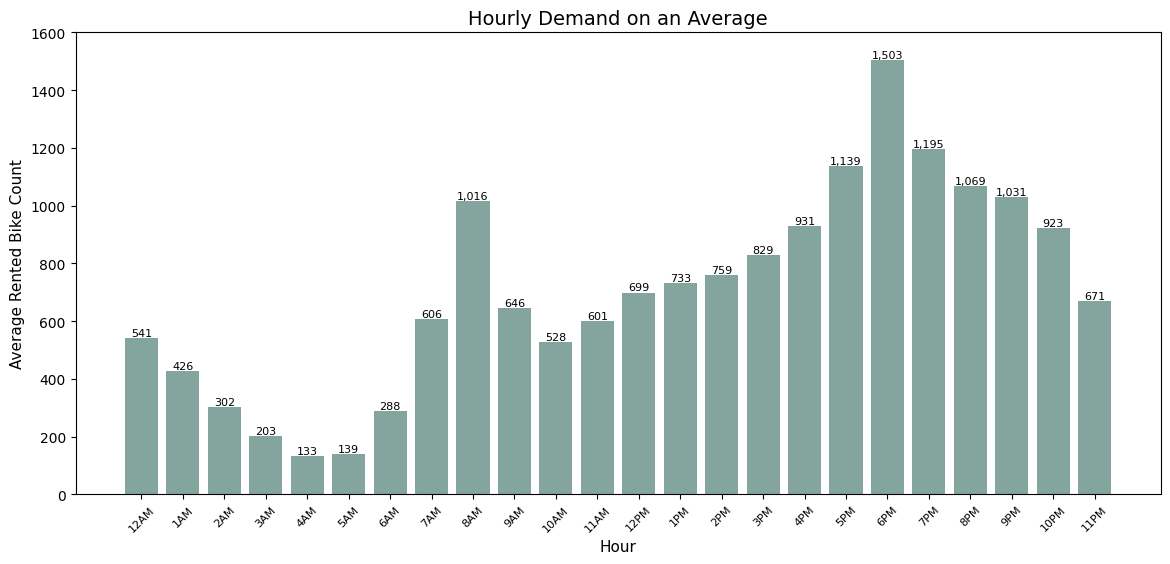

In [28]:
# Plot the bar chart
plt.figure(figsize= (14, 6))
bars = plt.bar(hourly_count.index, hourly_count, color='#84a59d')

# Set chart title and axis labels
plt.title('Hourly Demand on an Average', size= 14)
plt.xlabel('Hour', size= 11)
plt.ylabel('Average Rented Bike Count', size= 11)

# Custom y-axis limit and x-axis labels
plt.ylim(0, 1600)
plt.xticks(hourly_count.index,
        labels = [f'{hour % 12 if hour % 12 != 0 else 12}{"AM" if hour < 12 else "PM"}'
           for hour in range(24)], size= 8, rotation= 45
  )
# Add annotations for each bar with the corresponding number of bike counts
for bar, value in zip(bars, hourly_count):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:,.0f}',
             size= 8, ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

The bar graph was chosen because it is well-suited for displaying categorical data, such as hourly bike rental counts, in a straightforward and visually intuitive manner. By displaying each hour as a separate bar, the chart allows for easily visual comparison of bike rental counts throughout the day. This clarity makes it easy to identify peak hours of bike usage.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart of hourly demand for rented bikes are as follows:

1. The chart shows a notable peak in bike rental demand during the morning hours, specifically from 7 to 9 AM. This suggests a high demand from people who are likely using bikes for their daily routine to work or other morning activities.

2. There is a significant surge in demand observed in the evening hours, particularly from 5 to 7 PM. This peak indicates that bikes are also popular for returning back home from work or for evening activities.

3. During the hours between 10 AM and 5 PM, there is a general upward trend in bike rental demand. This could suggest a steady usage pattern throughout the day, potentially for leisure activities, short trips etc.

##### 3. Will the gained insights help creating a positive business impact?


These insights can potentially create a positive impact on the bike rental business:

1. Optimized Resource Allocation: Understanding the peak hours (morning and evening) allows the business to optimize bike inventory. They can ensure sufficient bikes are available during peak times to meet customer demand, thereby enhancing customer satisfaction and retention.

2. Targeted Marketing and Promotions: With knowledge of peak hours, the business can implement targeted marketing campaigns and promotions. For example, offering discounts or incentives during off-peak hours to encourage more consistent bike usage throughout the day.

Are there any insights that lead to negative growth? Justify with specific reason.


- Since the chart itself does not reflect any insights that might lead to negative growth, but bike rental service company need to have sufficient bikes in the peak hours (observed in the chart) to meet customer satisfaction.

#### **Chart - 4 (Relationship between Weather Features and Rented Bike Count)**

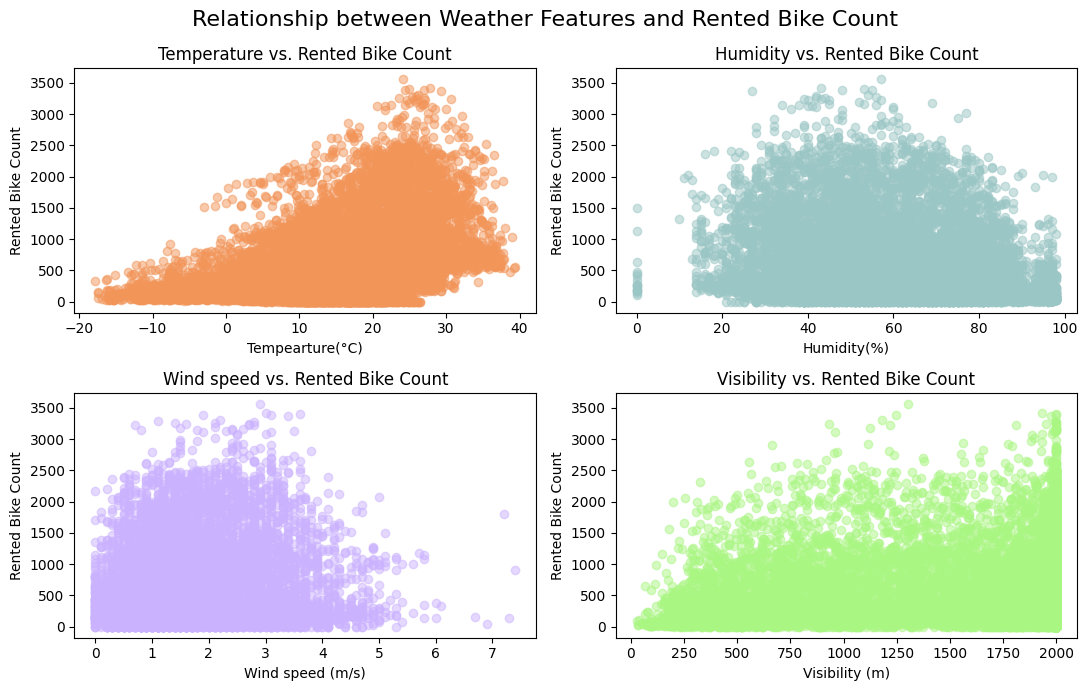

In [29]:
# Setting figure size and title for the plot
plt.figure(figsize= (11, 7))
plt.suptitle("Relationship between Weather Features and Rented Bike Count", size= 16)

# Plot 1. Temperature vs. Rented Bike Count
plt.subplot(2, 2, 1)
plt.scatter(bike_df["Temperature(°C)"], bike_df["Rented Bike Count"], color = "#f29559", alpha= 0.5)
plt.title("Temperature vs. Rented Bike Count", size= 12)
plt.xlabel("Tempearture(°C)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

# Plot 2. Humidity vs. Rented Bike Count
plt.subplot(2, 2, 2)
plt.scatter(bike_df["Humidity(%)"], bike_df["Rented Bike Count"], color = "#9ac6c5", alpha= 0.5)
plt.title("Humidity vs. Rented Bike Count", size= 12)
plt.xlabel("Humidity(%)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

# Plot 3. Wind speed vs. Rented Bike Count
plt.subplot(2, 2, 3)
plt.scatter(bike_df["Wind speed (m/s)"], bike_df["Rented Bike Count"], color = "#cbb2fe", alpha= 0.5)
plt.title("Wind speed vs. Rented Bike Count", size= 12)
plt.xlabel("Wind speed (m/s)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

# Plot 4. Visibility vs. Rented Bike Count
plt.subplot(2, 2, 4)
plt.scatter(bike_df["Visibility (10m)"], bike_df["Rented Bike Count"], color = "#aaf683", alpha= 0.5)
plt.title("Visibility vs. Rented Bike Count", size= 12)
plt.xlabel("Visibility (m)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)
plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots were chosen for this visualization because it directly shows the relationship between weather feature (Temperature, Humidity, Wind Speed &Visibility) and rented bike count. Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

1. The first plot between temperature and rented bike counts represents a left-skewed distribution, showing that most data points are clustered in the temperature range of 25 to 30°C. This suggests that bike rentals are more frequent when the temperature is in this moderate range or a bit a heigher.

2. The second plot between humidity and rented bike counts represents a normal distribution, showing that most data points are clustered in the humidity range of 20 to 80%. This suggests that bike rentals are relatively stable across a wide range of humidity levels, with peak rentals occurring in moderate humidity.

3. The third plot between wind speed and rented bike counts represents a right-skewed distribution, showing that most data points are clustered in the wind speed range of 0 to 4 m/s. This suggests that lower wind speeds are more favorable for bike rentals, as higher wind speeds might restrict people from renting bikes.

4. The fourth plot between visibility and rented bike counts represents a left-skewed distribution, suggesting that days with higher visibility tend to have a higher number of rented bikes.

##### 3. Will the gained insights help creating a positive business impact?


The gained insights can help create a positive business impact by:

1. By understanding that bike rentals are higher in the temperature range of 25 to 30°C and during days with higher visibility, the company can target marketing and promotional efforts during these favorable conditions to maximize rentals.

2. Knowing that bike rentals are stable across moderate humidity levels and low wind speeds, the company can optimize bike availability to ensure a sufficient number of bikes are ready for rental during these conditions

Are there any insights that lead to negative growth? Justify with specific reason.


There are also some potential negative implications of the insights that need to be addressed:

The right-skewed distribution for wind speed indicates that higher wind speeds might affect bike rentals. Similarly, extreme temperatures outside the comfortable range of 25 to 30°C could reduce rentals.

#### **Chart - 5 (Holiday vs. Non Holiday)**

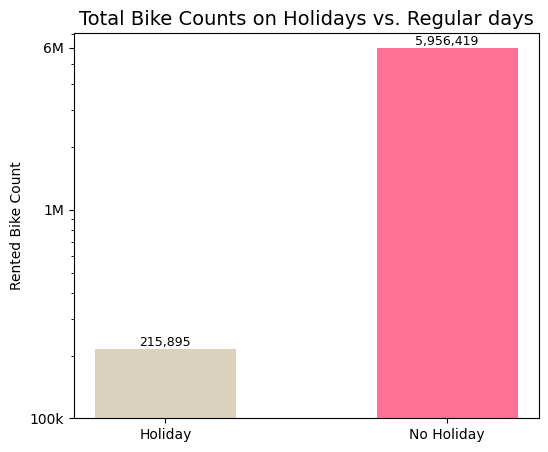

In [30]:
# Define color for the chart
colors = ["#dad2bc", "#ff7096"]

# Plot the bar chart
plt.figure(figsize= (6, 5))
bars = plt.bar(holiday_count.index, holiday_count, width= 0.5, color= colors)

# Set chart title and axis labels
plt.title("Total Bike Counts on Holidays vs. Regular days", size= 14)
plt.xlabel("")
plt.ylabel("Rented Bike Count", size= 10)

# Custom y-ticks range
plt.yscale('log')
plt.yticks(ticks=[1e5, 1e6,  6e6], labels=['100k', '1M', '6M'])

# Add annotations for each bar with the corresponding number of bike counts
for bar, value in zip(bars, holiday_count):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:,}',
             size= 9, ha='center', va='bottom')

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it effectively represents categorical data (Holiday) and associated quantitative values (bike counts). The bars corresponding to the count of rented bikes allow for easy visualization and comparison of the results.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

1. The number of rented bikes on non-holidays (regular days) is significantly higher than on holidays, which indicates that people are more likely to rent bikes for daily commuting or regular activities during workdays.

2. The lower demand for rented bikes on holidays indicates that fewer people opt for bike rentals during holidays compared to regular days, the reason could be, whether they prefer to stay at home or they have other transportation preferences.

##### 3. Will the gained insights help creating a positive business impact?

The gained insights can help create a positive business impact by:

- Understanding the higher demand for rented bikes on regular days compared to holidays allows the business to optimize staffing and bike availability accordingly. This insight enables targeted marketing and promotional strategies to attract more customers on holidays and maintain service efficiency on regular days.

Are there any insights that lead to negative growth? Justify with specific reason.

- The lower demand for rented bikes on holidays could potentially lead to negative growth if not addressed. Implementing targeted marketing tactics and discount offers would be essential to incentivize customers to choose bike rentals during holidays."

#### **Chart - 6 (Functional Day Anlaysis)**

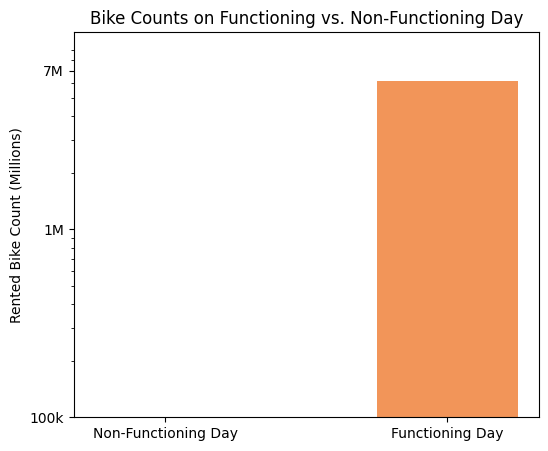

In [31]:
# Define color for the chart
colors = ["#b8b08d", "#f29559"]

# Plot the bar chart
plt.figure(figsize= (6, 5))
plt.bar(functioning_day_count.index, functioning_day_count, width= 0.5, color= colors)

# Set chart title and axis labels
plt.title("Bike Counts on Functioning vs. Non-Functioning Day", size= 12)
plt.xlabel("")
plt.ylabel("Rented Bike Count (Millions)", size= 10)

# Custom x-axis ticks and y-ticks range
plt.xticks([0, 1], ['Non-Functioning Day', 'Functioning Day'])
plt.yscale('log')
plt.yticks(ticks=[1e5, 1e6,  7e6], labels=['100k', '1M', '7M'])

plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it effectively represents categorical data (Functioning day) and associated quantitative values (bike counts). The bars corresponding to the count of rented bikes allow for easy visualization and comparison of the results.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The chart shows that 6,172,314 bikes were rented on functional (operational) days, indicating a robust demand for bike rentals during operational days. The absence of rentals on non-functional days suggests that the company did not shut down operations on any day during the observed period.

##### 3. Will the gained insights help creating a positive business impact?


The gained insights can help create a positive business impact by:

- Knowing that there were no non-functional days suggests a consistent service availability, which is likely to build customer trust and satisfaction. This consistency can lead to repeat customers and positive impact on business.

Are there any insights that lead to negative growth? Justify with specific reason.

- Since the chart itself does not reflect any insights that might lead to negative growth, but it needs to be consider that if the company's operational days do not align with customer needs (e.g., closures on peak demand days or non-availability of bikes), it could affect business revenue and lead to negative customer experiences.

#### **Chart - 7 (Relationship between Temperature and Humidity)**

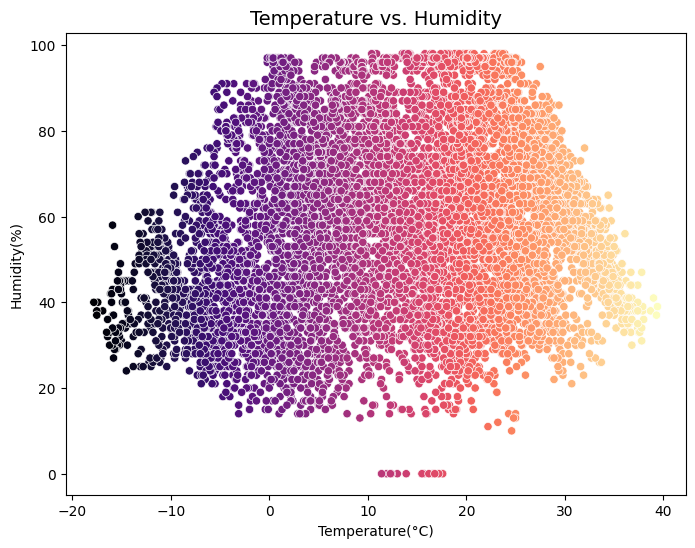

In [32]:
# Plot the chart
plt.figure(figsize= (8, 6))
sns.scatterplot(data=bike_df, x="Temperature(°C)", y="Humidity(%)", hue="Temperature(°C)", palette= "magma")

# Set title and axis labels
plt.title("Temperature vs. Humidity", size= 14)
plt.xlabel("Temperature(°C)", size= 10)
plt.ylabel("Humidity(%)", size= 10)
plt.legend().remove()

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen for this visualization because it directly shows the relationship between weather features i.e Temperature & Humidity. Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The concentration of data points around moderate temperature and humidity levels suggests that the dataset reflects typical weather conditions where neither extremely hot nor extremely humid conditions are prevalent. This could imply that the bike rental business may not face as many operational challenges related to weather extremes, potentially leading to smoother operations throughout most weather conditions.


##### 3. Will the gained insights help creating a positive business impact?


- Operational Stability: The business can anticipate stable demand and operational patterns, which can facilitate better resource allocation and planning.

- Customer Satisfaction: Moderate weather conditions are generally favorable for biking, ensuring a good experience for customers, which can enhance customer satisfaction and retention.

Are there any insights that lead to negative growth? Justify with specific reason.

However, the chart itself does not reflect any insights that might lead to negative growth, but company might need to address the possibilities of extreme weather in future and to make plans for seamless services in such conditions.

#### **Chart - 8 (Relationship between Rainfall, Snowfall, and Rented Bike Count)**

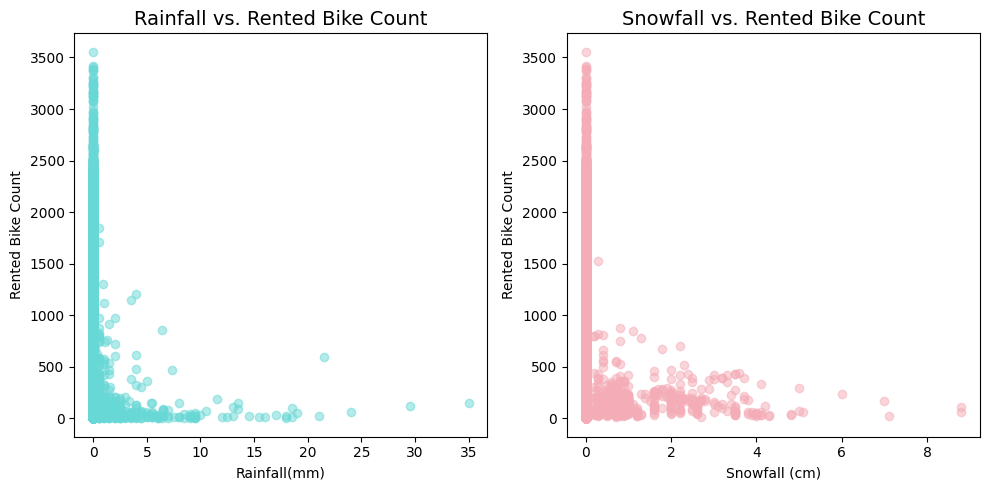

In [33]:
# Create subplots with shared y-axis
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(bike_df["Rainfall(mm)"], bike_df["Rented Bike Count"], color="#68d8d6", alpha= 0.5)
plt.title("Rainfall vs. Rented Bike Count", size= 14)
plt.xlabel("Rainfall(mm)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

plt.subplot(1, 2, 2)
plt.scatter(bike_df["Snowfall (cm)"], bike_df["Rented Bike Count"], color="#f4acb7", alpha= 0.5)
plt.title("Snowfall vs. Rented Bike Count", size= 14)
plt.xlabel("Snowfall (cm)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots were chosen as they effectively display the relationship between continuous variables like rainfall, snowfall, and bike rentals. They enable easy detection of patterns, outliers, and correlations. Additionally, separate plots for rainfall and snowfall allow for a clear comparison of their impact on bike rentals.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

The majority of data points in both the charts are clustered around 0 on the x-axis, signifying that bikes are rented on days with very low or no rainfall and snowfall.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights can help create a positive business impact by allowing the company to:

1. Optimize Resource Allocation: Knowing that bikes are mostly rented on days with low or no precipitation helps the company allocate resources more efficiently, ensuring enough bikes are available on days with favorable weather.

2. Maintenance Scheduling: Maintenance can be scheduled on days with higher expected rainfall or snowfall, as bike rentals are likely to be lower.

Are there any insights that lead to negative growth? Justify with specific reason.

The charts themselves do not directly reflect insights that might lead to negative growth. However, the company should consider the following points:

1. Heavy reliance on favorable weather conditions could lead to significant fluctuations in demand. During periods of frequent rainfall or snowfall, the company might experience a drop in rentals.

2. If the company is not prepared for extreme weather conditions, it might lead to negative customer experiences.

#### **Chart - 9 (Relationship between Solar Radiation and Temperature)**

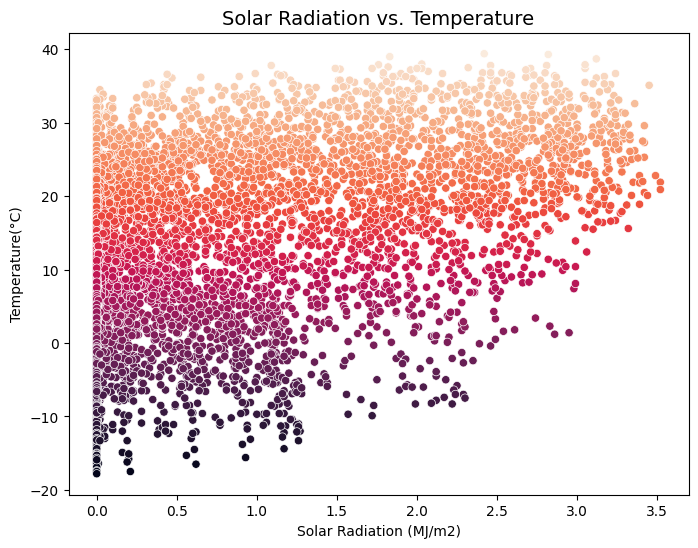

In [34]:
# Plot the chart
plt.figure(figsize= (8, 6))
sns.scatterplot(data=bike_df, x="Solar Radiation (MJ/m2)", y="Temperature(°C)", hue="Temperature(°C)", palette= "rocket")

# Set title and axis labels
plt.title("Solar Radiation vs. Temperature", size= 14)
plt.xlabel("Solar Radiation (MJ/m2)", size= 10)
plt.ylabel("Temperature(°C)", size= 10)
plt.legend().remove()

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen for this visualization because it directly shows the relationship between weather features i.e Temperature & Humidity. Scatter plots are ideal for visualizing the patterns, outliers and the trend associated with data.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The scattered distribution of data points shows that most data points cluster between 0.0 and 0.5 on the y-axis (Solar Radiation) and between 10 and 30 on the y-axis (Temprature). This suggests that the dataset primarily consists of moderate temperatures with lower solar radiation levels. Higher solar radiation is associated with warmer temperatures, but such instances are less frequent.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights derived from the charts can have a positive business impact in several ways:

1. The company can develop targeted marketing campaigns focusing on days with moderate temperatures and low solar radiation, potentially increasing customer engagement and rentals.

2. Knowing that bike rentals are common at moderate temperatures and lower solar radiation levels helps the company ensure bike availability during these conditions, maximizing rental opportunities.


Are there any insights that lead to negative growth? Justify with specific reason.

While the charts do not directly indicate insights that might lead to negative growth, but it is necessary to consider some points:

1.  If the company does not address the need for services in higher solar radiation and warmer temperatures, it might miss out on potential customers who wish to rent bikes during these times, leading to decreased market coverage.

2. Heavy reliance on moderate weather conditions could lead to fluctuations in demand. If the company is unprepared for extreme weather, it might face reduced rentals during less favorable conditions.

#### **Chart - 10 (Relationship between Dew Point Temperature and Rented Bike Count)**

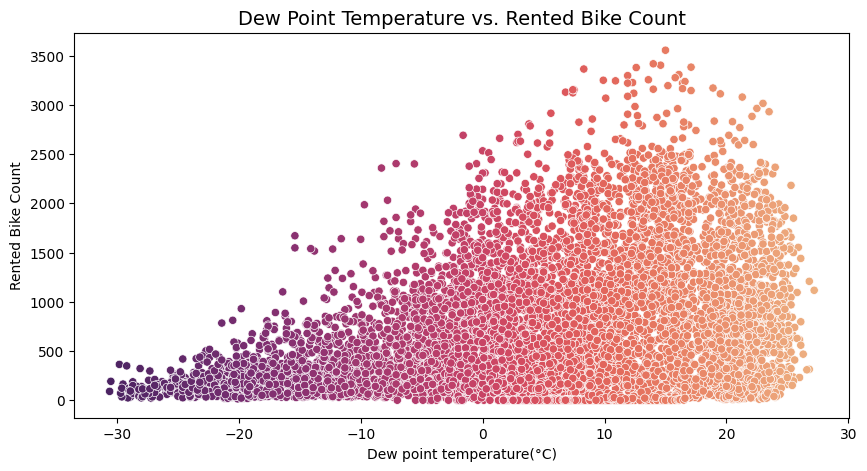

In [35]:
# Plot the chart
plt.figure(figsize= (10, 5))
sns.scatterplot(data= bike_df, x="Dew point temperature(°C)", y="Rented Bike Count", hue="Dew point temperature(°C)", palette="flare_r")

# Set title and axis labels
plt.title("Dew Point Temperature vs. Rented Bike Count", size= 14)
plt.xlabel("Dew point temperature(°C)", size= 10)
plt.ylabel("Rented Bike Count", size= 10)

plt.legend().remove()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was chosen because it effectively displays the relationship between dew point temperature and bike rentals, both of which are continuous variables. This type of plot allows for easy identification of patterns, outliers, and correlation between the two factors.

##### 2. What is/are the insight(s) found from the chart?

The insights gained from the chart are as follows:

- The left-skewed distribution suggests that lower dew point temperatures are more common on days when bikes are rented. Lower dew point temperatures generally indicate more comfortable and less humid conditions. This insight suggests that customers may find it more pleasant to engage in outdoor activities like bike rentals on days with lower humidity levels.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the insights derived from the charts can have a positive business impact in several ways:

- Understanding that bike rentals are more frequent on days with lower dew point temperatures and moderate humidity levels allows the company to target promotions and services on such days. Additionally, planning maintenance and staffing during less favorable weather conditions can improve operational efficiency.

Are there any insights that lead to negative growth? Justify with specific reason.

There are no direct insights from this analysis that indicate negative growth. However, if the company does not address the preferences for comfortable weather conditions, it could miss opportunities for maximizing rentals. Ensuring services and marketing align with customer preferences can mitigate potential negative impacts.

#### **Chart - 11 (Correlation Heatmap)**

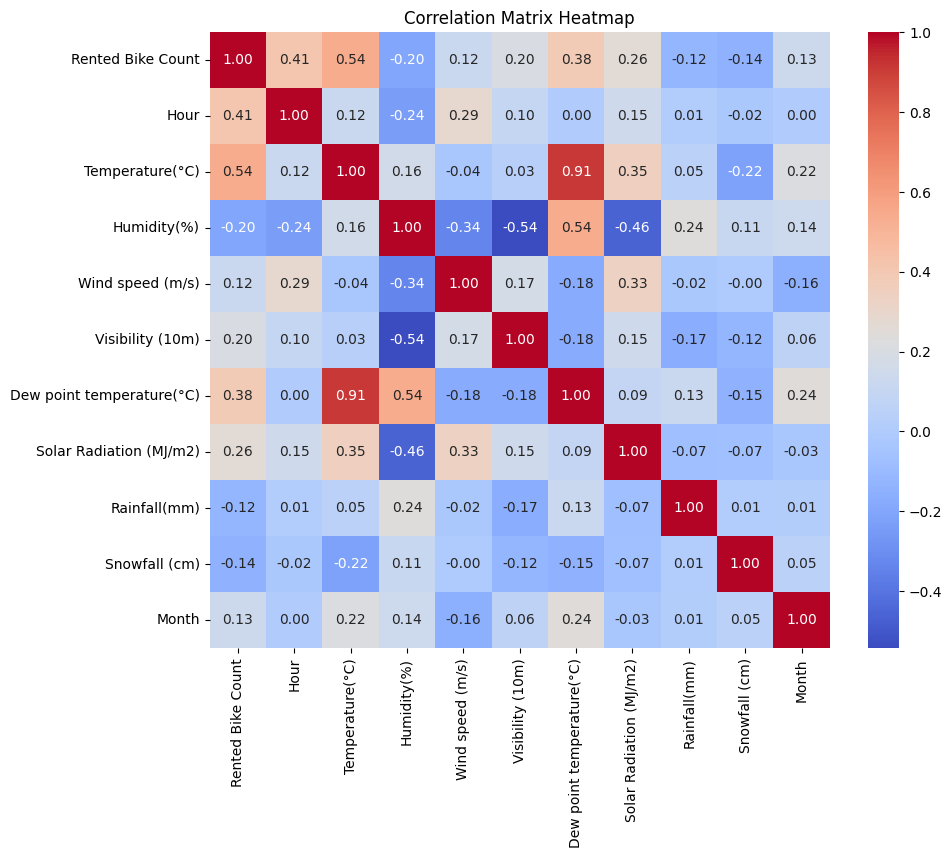

In [36]:
# Plot the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen to visualize the relationships between multiple variables in the dataset for several reasons:

- The heatmap is specifically suited for analyzing the correlation coefficient between numerical variables and quantify the strength and direction of the relationships between pairs of columns.

- The color and intensity of each cell represent the correlation coefficient between two variables. Dark red cells indicate strong positive correlations, while dark blue cells represent strong negative correlations.

- The heatmap summarizes complex correlation data into a single, easily interpretable visual, making it efficient for communication and analysis.

##### 2. What is/are the insight(s) found from the chart?

Several insights are drawn from the chart, which are as follows as:

1. The correlation coefficient between Temperature(°C) and Rented Bike Count is 0.54, indicating a moderately strong positive correlation. This suggests that as the temperature increases, the number of rented bikes tends to increase.

2. The correlation coefficient between Dew Point Temperature(°C) and Temperature(°C) is 0.90, indicating a strong positive correlation. This suggests that as the temperature increases, the Dew Point Temperature(°C) also increase.

3. The correlation coefficient between Hour and Rented Bike Count is 0.41, indicating a moderate positive correlation. This suggests that as the hour of the day increases, the number of rented bikes also tends to increase.

4. The correlation coefficient between Dew point Temperature(°C) and Rented Bike Count is 0.38, indicating a moderate positive correlation. This suggests that as the dew point temperature increases, the number of rented bikes tends to increase.

5. The correlation coefficient between Solar Radiation(Mj/m2) and Temperature(°C) is 0.35, indicating a moderate positive correlation. This suggests that as the temperature increases, the solar Radiation tends to increase which is obvious.

6. The correlation coefficient between Solar Radiation (MJ/m2) and Rented Bike Count is 0.26, indicating a moderate positive correlation. This suggests that as solar radiation increases, the number of rented bikes tends to increase.

7. The correlation coefficient between Humidity(%) and Rented Bike Count is -0.20, indicating a weak negative correlation. This suggests that as humidity increases, the number of rented bikes may tend to decrease slightly.

8. The correlation coefficients for Visibility (10m) and Wind speed (m/s) are relatively low (0.20 and 0.12 respectively), indicating weak correlations with the number of rented bikes.

9. The correlation coefficients for Rainfall(mm) and Snowfall (cm) are both negative, but their values are close to zero. This suggests a weak negative relationship with the number of rented bikes.

10. Hour, Temperature, Dew Point Temperature, and Solar Radiation have the highest positive correlations with Rented Bike Count. These variables may be important predictors in further regression model building.

#### **Chart - 12 (Pair Plot)**

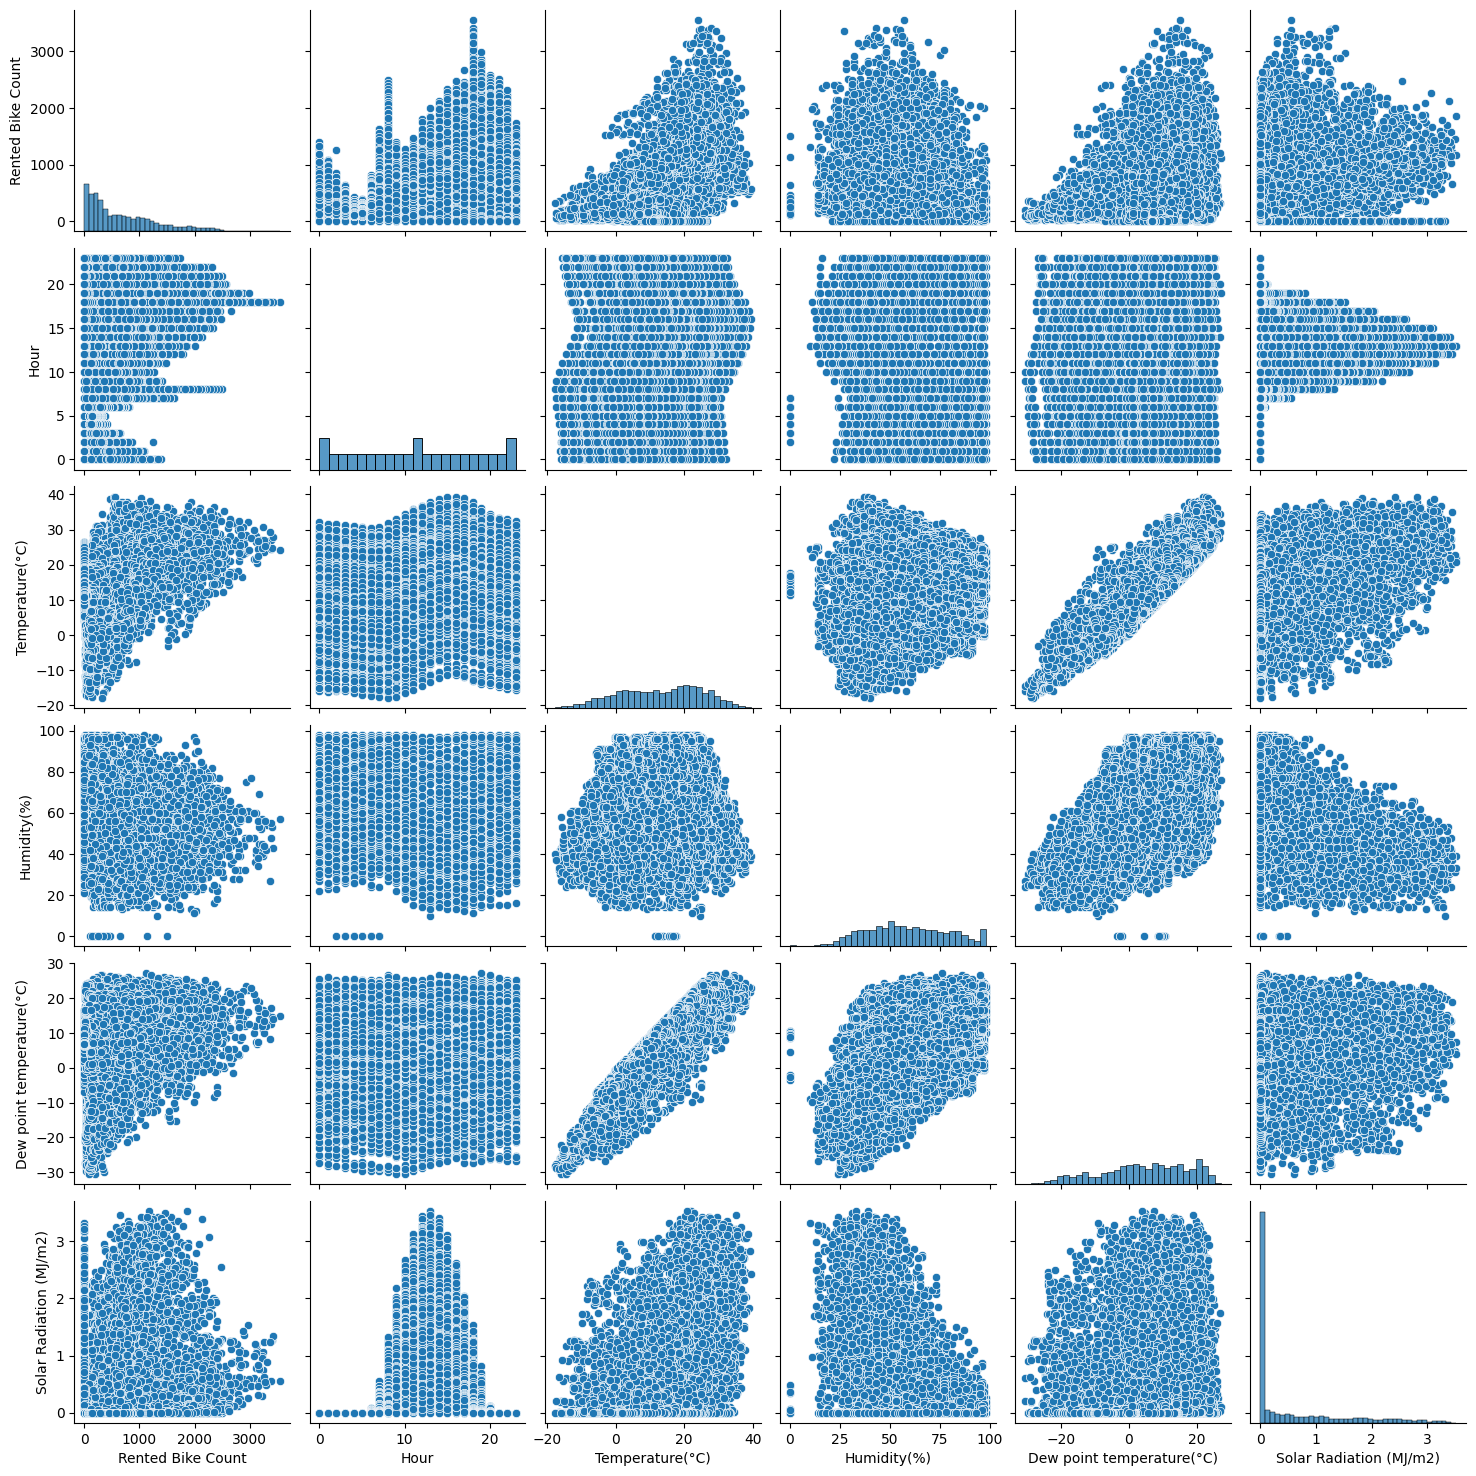

In [37]:
# Define the columns for the pairplot
variables = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)']

# Create a pair plot
sns.pairplot(bike_df[variables])

plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen to visualize the relationships between pairs of variables in the dataset due to the following reasons:

- The pair plot displays scatter plots for every possible pair of variables in the dataset on a single grid. This allows to visually assess both pairwise relationships and identify potential patterns or trends across all variables simultaneously.

- By visualizing multiple variables simultaneously, the pair plot facilitates the exploration of how different variables relate to each other, revealing potential dependencies and the strength of relationships.

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart there are several insights are drawn, which are as follows as:

1. Hour vs. Rented Bike Count: The left-skewed distribution suggests that during certain hours, there's a higher demand for rented bikes. This indicate peak demand of bike throughout the day.

2. Temperature vs. Rented Bike Count: The left-skewed distribution implies that as temperature increases, the demand for rented bikes tends to increase. However, there's a limit to this trend, as the distribution is not symmetrical.

3. Humidity vs. Rented Bike Count: The normal distribution indicates that there's no clear trend between humidity levels and the number of rented bikes. This suggests that humidity might not be a strong predictor on its own.

4. Dew Point Temperature vs. Rented Bike Count: The left-skewed distribution suggests that as dew point temperature rises, the demand for rented bikes generally increases. Again, there's a limit to this trend.

5. Solar Radiation vs. Rented Bike Count: The right-skewed distribution implies that as solar radiation increases, the demand for rented bikes tends to increase. This suggests that sunny days might lead to higher bike usage.

These insights provide valuable information for modeling the relationship between these variables and the number of rented bikes.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [42]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [43]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [44]:
# Expand Contraction

#### 2. Lower Casing

In [45]:
# Lower Casing

#### 3. Removing Punctuations

In [46]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [47]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [48]:
# Remove Stopwords

In [49]:
# Remove White spaces

#### 6. Rephrase Text

In [50]:
# Rephrase Text

#### 7. Tokenization

In [51]:
# Tokenization

#### 8. Text Normalization

In [52]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [53]:
# POS Taging

#### 10. Text Vectorization

In [54]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [55]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [56]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [57]:
# Transform Your data

### 6. Data Scaling

In [58]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [59]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [60]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [61]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [62]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [67]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [70]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [71]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***